In [3]:
%pip install networkx pyvis

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import seaborn as sns

In [5]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
#read the data file and create a data frame
G = nx.read_gml('../../data/karate.gml', label='id')

In [7]:
#print the number of vertices and edges
print(G)

Graph with 34 nodes and 78 edges


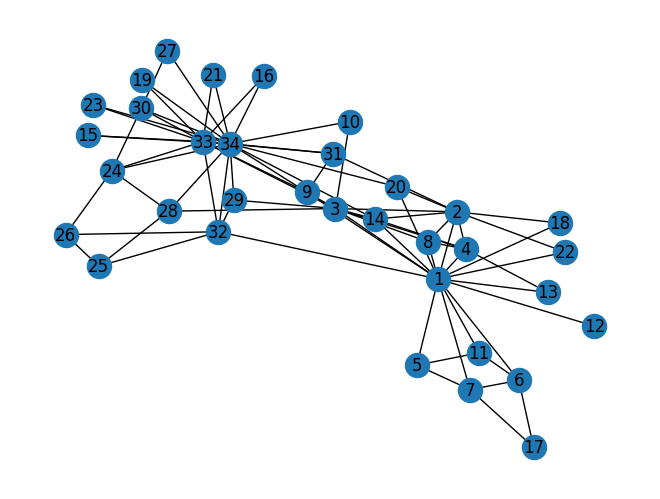

In [8]:
#display the graph

nx.draw(G, with_labels=True)

In [9]:
#import Pyvis
from pyvis.network import Network


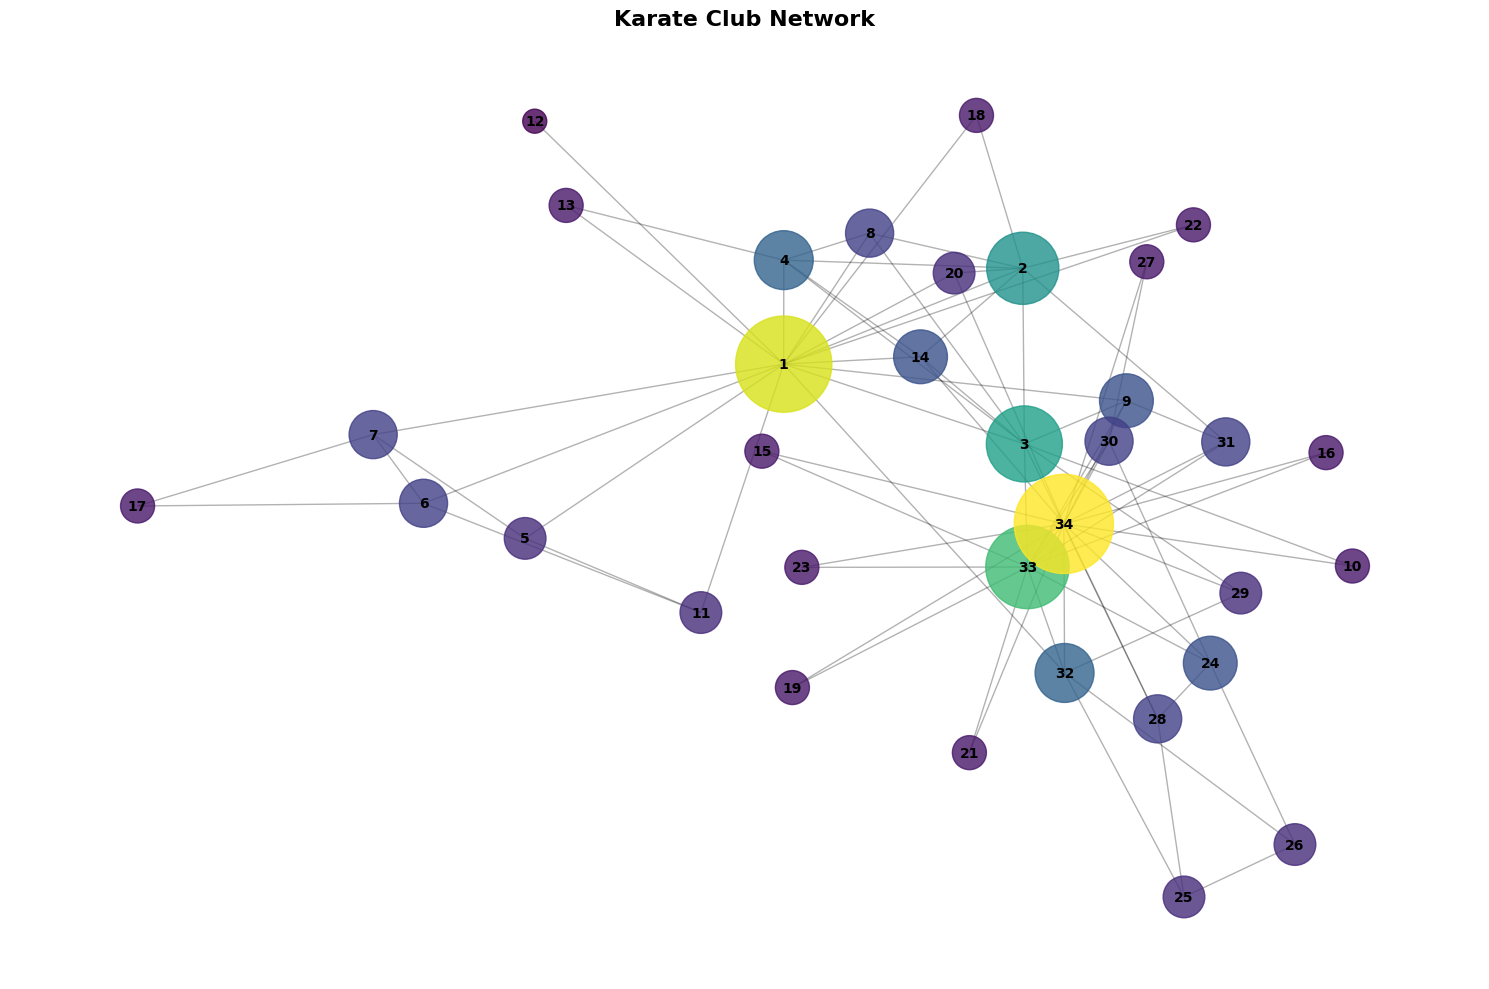

Network has 34 nodes and 78 edges


In [10]:
#draw the graph with better visualization
plt.figure(figsize=(15, 10))

# Use spring layout for better node positioning
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw nodes with color based on degree
node_sizes = [300 * G.degree(node) for node in G.nodes()]
node_colors = [G.degree(node) for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, 
                       node_size=node_sizes,
                       node_color=node_colors,
                       cmap='viridis',
                       alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3, width=1)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Karate Club Network', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Network has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

In [11]:
#print all the nodes
print(G.nodes)

#print the edges
print(G.edges)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (10, 34), (14, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (25, 26), (25, 28), (25, 32), (26, 32), (27, 30), (27, 34), (28, 34), (29, 32), (29, 34), (30, 33), (30, 34), (31, 33), (31, 34), (32, 33), (32, 34), (33, 34)]


In [12]:
#get the neighbors of a node
print(neighbors := list(G.neighbors(1)))

[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]


In [13]:
#degree centrality = # of neighbor / # of neighbors in a complete graph
print(nx.degree_centrality(G))

{1: 0.48484848484848486, 2: 0.2727272727272727, 3: 0.30303030303030304, 4: 0.18181818181818182, 5: 0.09090909090909091, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.12121212121212122, 9: 0.15151515151515152, 10: 0.06060606060606061, 11: 0.09090909090909091, 12: 0.030303030303030304, 13: 0.06060606060606061, 14: 0.15151515151515152, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.06060606060606061, 20: 0.09090909090909091, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.06060606060606061, 24: 0.15151515151515152, 25: 0.09090909090909091, 26: 0.09090909090909091, 27: 0.06060606060606061, 28: 0.12121212121212122, 29: 0.09090909090909091, 30: 0.12121212121212122, 31: 0.12121212121212122, 32: 0.18181818181818182, 33: 0.36363636363636365, 34: 0.5151515151515151}


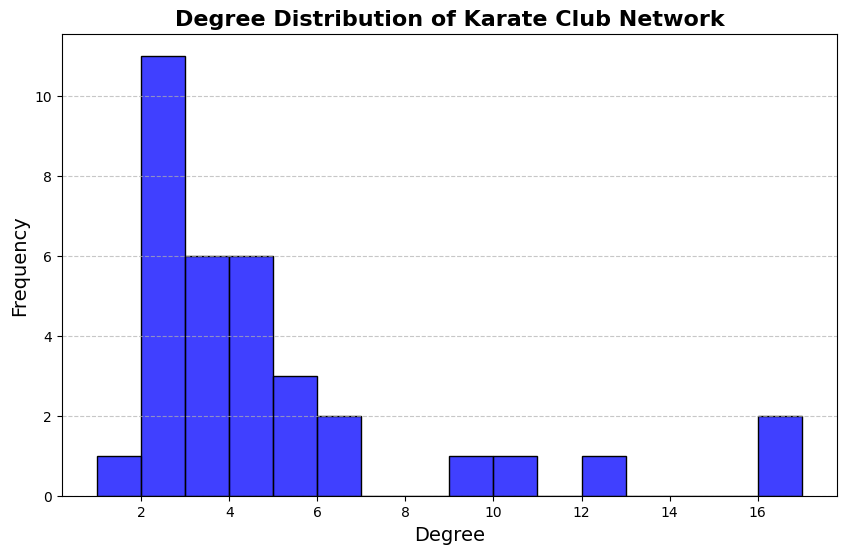

In [14]:
#### Distribution of degrees in the graph
degree_sequence = [d for n, d in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degree_sequence, bins=range(1, max(degree_sequence) +
1), kde=False, color='blue')
plt.title('Degree Distribution of Karate Club Network', fontsize=16, fontweight='bold')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

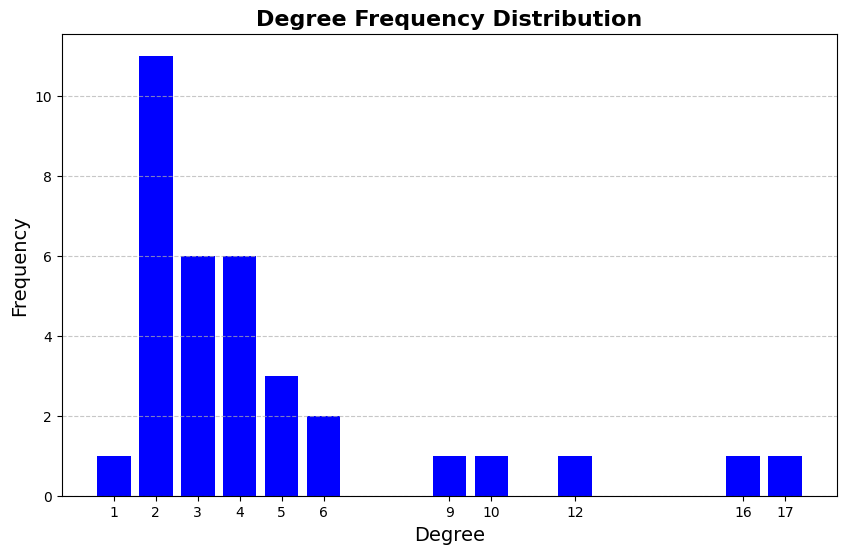

In [15]:
#import library
from collections import Counter

#calculate degree frequency
degree_freq = Counter(degree_sequence)
deg, freq = zip(*degree_freq.items())
#deg, freq
plt.figure(figsize=(10, 6))
plt.bar(deg, freq, width=0.80, color='b')
plt.title('Degree Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([d for d in deg])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [16]:
#get the distribution of degrees
from collections import Counter

degree_count = Counter([degree for node, degree in G.degree()])
print(degree_count)

Counter({2: 11, 3: 6, 4: 6, 5: 3, 6: 2, 16: 1, 9: 1, 10: 1, 1: 1, 12: 1, 17: 1})


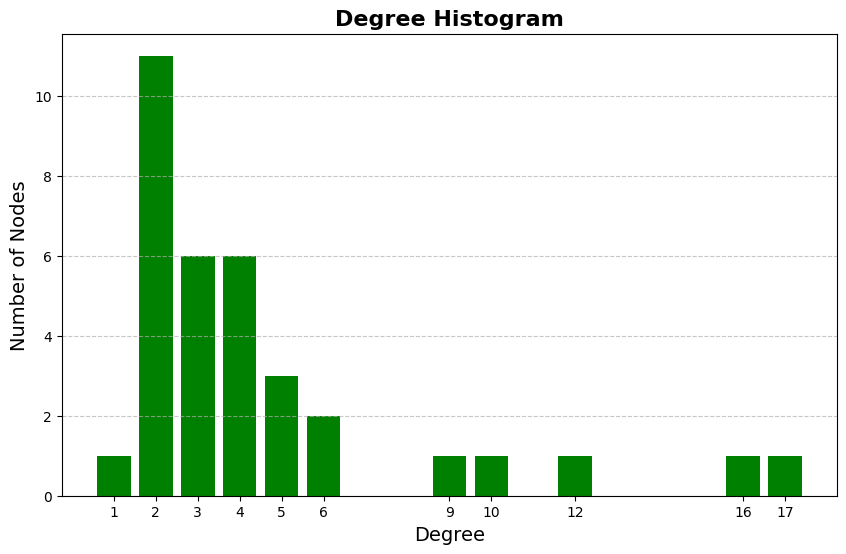

In [17]:
#get the distribution of degrees
degree_hist = pd.DataFrame({'Degree': list(degree_count.keys()),
                            'Number of Nodes': list(degree_count.values())})

#plot the data of Degree vs Number of Nodes histogram
plt.figure(figsize=(10, 6))
plt.bar(degree_hist['Degree'], degree_hist['Number of Nodes'], width=0.80, color='g')
plt.title('Degree Histogram', fontsize=16, fontweight='bold')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.xticks(degree_hist['Degree'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
#define a function that gives nodes with m neighbors
def node_mnbrs (G, m):
    node = set()
    for n in G.nodes():
        if len(list(G.neighbors(n))) == m:
            node.add(n)
    return node

In [19]:
#print the nodes of a given degree
print(node_mnbrs(G, 1))


{12}


In [20]:
#density of edges = number of edges / all possible edges
print(nx.density(G))

0.13903743315508021


In [21]:
# diameter of graph = length of the shortest path between the furthest nodes

print(nx.shortest_path(G, source=1, target=20))

print(nx.diameter(G))

[1, 20]
5


In [22]:
#node connectivity = minimum number of nodes that need to be removed to disconnect the graph
print(nx.node_connectivity(G))

1


In [23]:
#betweeness centrality = fraction of all the shortest paths passing through the nodes
between = nx.betweenness_centrality(G)
print(between)

{1: 0.43763528138528146, 2: 0.053936688311688304, 3: 0.14365680615680618, 4: 0.011909271284271283, 5: 0.0006313131313131313, 6: 0.02998737373737374, 7: 0.029987373737373736, 8: 0.0, 9: 0.05592682780182781, 10: 0.0008477633477633478, 11: 0.0006313131313131313, 12: 0.0, 13: 0.0, 14: 0.04586339586339586, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.03247504810004811, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.017613636363636363, 25: 0.0022095959595959595, 26: 0.0038404882154882154, 27: 0.0, 28: 0.02233345358345358, 29: 0.0017947330447330447, 30: 0.0029220779220779218, 31: 0.014411976911976909, 32: 0.13827561327561325, 33: 0.145247113997114, 34: 0.30407497594997596}


In [24]:
##### Determination of Cliques 
# find all cliques in the graph
cliques = list(nx.find_cliques(G))
print(f"Number of cliques in the graph: {len(cliques)}")
print("Cliques:")
for clique in cliques:
    print(clique)

Number of cliques in the graph: 36
Cliques:
[1, 32]
[1, 2, 18]
[1, 2, 3, 4, 8]
[1, 2, 3, 4, 14]
[1, 2, 20]
[1, 2, 22]
[1, 5, 11]
[1, 5, 7]
[1, 6, 11]
[1, 6, 7]
[1, 9, 3]
[1, 12]
[1, 13, 4]
[2, 31]
[3, 33, 9]
[3, 10]
[3, 28]
[3, 29]
[6, 17, 7]
[34, 33, 32]
[34, 33, 9, 31]
[34, 33, 15]
[34, 33, 16]
[34, 33, 19]
[34, 33, 21]
[34, 33, 23]
[34, 33, 24, 30]
[34, 10]
[34, 14]
[34, 20]
[34, 27, 30]
[34, 28, 24]
[34, 29, 32]
[25, 32, 26]
[25, 28]
[26, 24]


In [33]:
#find the cliques of a given size
def maximal_cliques(G, s):
    mcs = []
    for clique in (nx.find_cliques(G)):
        if len(clique) == s:
            mcs.append(clique)
    return mcs

In [35]:
print(maximal_cliques(G, 5))

[[1, 2, 3, 4, 8], [1, 2, 3, 4, 14]]


In [28]:
#find neighbors
nodes = list(G.neighbors(1))
print(nodes)

[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]


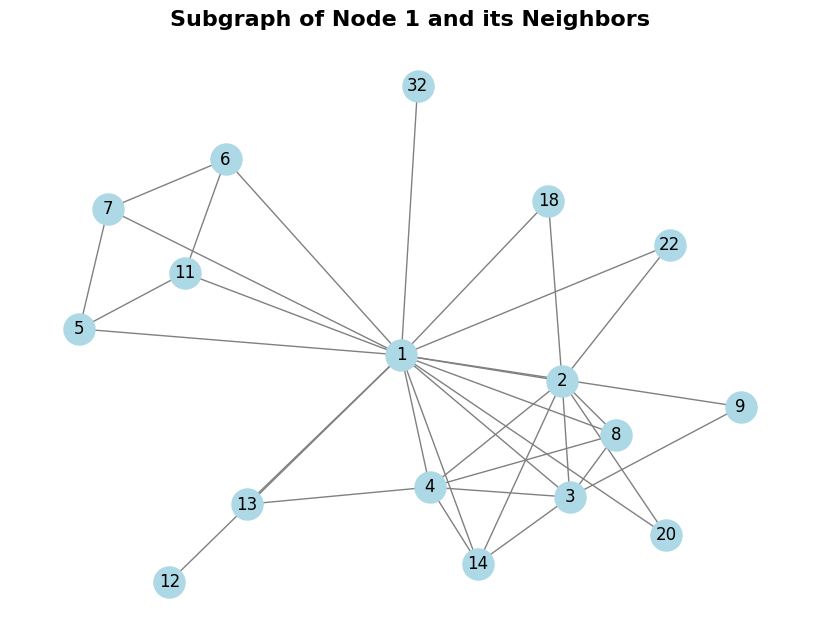

In [37]:
#create a subgraph of 1 and its neighbors
nodes.append(1)
G_one = G.subgraph(nodes)
G_one

#draw it
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_one)
nx.draw(G_one, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=12)
plt.title('Subgraph of Node 1 and its Neighbors', fontsize=16, fontweight='bold')
plt.show()

In [50]:
### Game of Thrones

GOT = pd.read_csv('../../data/got_book_1.csv')

In [52]:
GOT.shape
GOT.head(5)

#print number of unique characters
print(len(set(GOT['Source']).union(set(GOT['Target']))))

#print number of connections
print(GOT.shape[0])

187
684


In [53]:
#print who is the most important person in the series
import networkx as nx
G = nx.from_pandas_edgelist(GOT, 'Source', 'Target')
centrality = nx.degree_centrality(G)
most_important = max(centrality, key=centrality.get)
print(f"The most important character in Game of Thrones is: {most_important}")

The most important character in Game of Thrones is: Eddard-Stark
